## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
data = pd.read_csv('Food_Delivery_Times.csv')
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


### Data Understanding

In [3]:
print (f'Data shape: {data.shape}')

Data shape: (1000, 9)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


### Check and Fix Data (if necessary)

In [5]:
#check objects data dtypes
categorical_columns = data.select_dtypes(include='object')
for columns in categorical_columns:
  print(data[columns].value_counts())
  print('====================')

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64
Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


In [6]:
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### Handle Duplicated Data

In [7]:
#Check ratio of unique values
len(data.drop_duplicates(subset = ['Order_ID'])) / len(data)

1.0

There is no duplicate found.

## Data Cleaning_EDA

In [8]:
data_eda = data.copy()

### Handle Missing Data

In [9]:
#check missing values
missing_eda = data_eda.isnull().sum().reset_index()
missing_eda.columns = ['features', 'missing_values']
missing_eda['percentage'] = (missing_eda['missing_values']/len(data_eda)) *100
missing_eda

,features,missing_values,percentage
0,Order_ID,0,0.0
1,Distance_km,0,0.0
2,Weather,30,3.0
3,Traffic_Level,30,3.0
4,Time_of_Day,30,3.0
5,Vehicle_Type,0,0.0
6,Preparation_Time_min,0,0.0
7,Courier_Experience_yrs,30,3.0
8,Delivery_Time_min,0,0.0


In [10]:
# Handling missing values untuk setiap kolom

# Kolom categorical - mode imputation
missing_cols = ['Weather','Traffic_Level','Time_of_Day']

for col in missing_cols:
    mode_value = data_eda[col].mode()
    data_eda[col].fillna(mode_value, inplace=True)
    print(f"Kolom {col}: diisi dengan modus = {mode_value}")

Kolom Weather: diisi dengan modus = 0    Clear
Name: Weather, dtype: object
Kolom Traffic_Level: diisi dengan modus = 0    Medium
Name: Traffic_Level, dtype: object
Kolom Time_of_Day: diisi dengan modus = 0    Morning
Name: Time_of_Day, dtype: object


/tmp/ipython-input-1377381992.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_eda[col].fillna(mode_value, inplace=True)


In [11]:
#Weather
mode_value = data_eda['Weather'].mode()[0]
data_eda['Weather'].fillna(mode_value, inplace=True)

#Traffic_level
mode_value = data_eda['Traffic_Level'].mode()[0]
data_eda['Traffic_Level'].fillna(mode_value, inplace=True)

#Time of day
mode_value = data_eda['Time_of_Day'].mode()[0]
data_eda['Time_of_Day'].fillna(mode_value, inplace=True)

#Courier experience years
median_value = data_eda['Courier_Experience_yrs'].median()
data_eda['Courier_Experience_yrs'].fillna(median_value, inplace=True)

/tmp/ipython-input-936441065.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_eda['Courier_Experience_yrs'].fillna(median_value, inplace=True)


In [12]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


## Data Manipulation

In [13]:
# Pilih kolom numerik
numeric_cols = data_eda.select_dtypes(include=['number']).columns
numeric_cols

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

In [14]:
import scipy.stats as stats

def check_plot(data_eda, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data_eda[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(data_eda[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data_eda[variable])
    plt.title('Boxplot')

    plt.show()

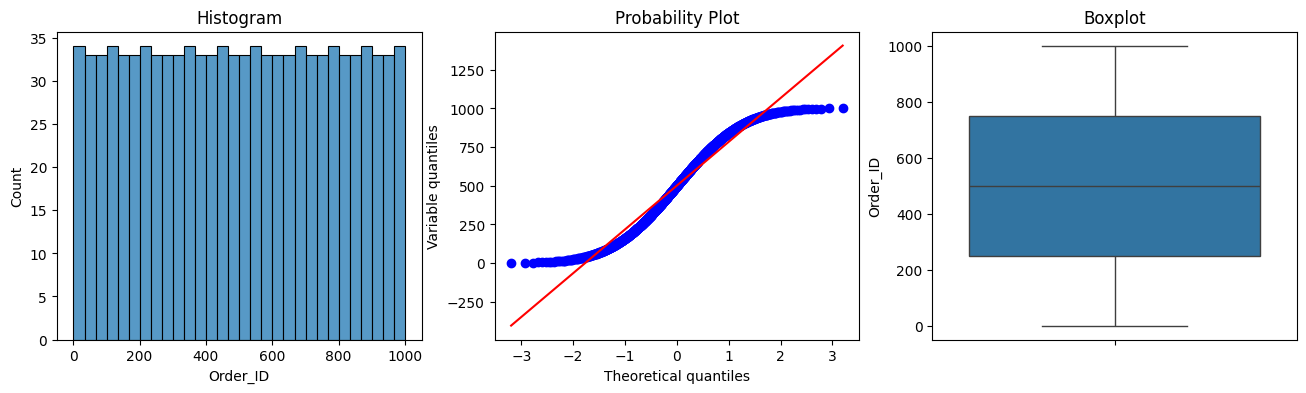

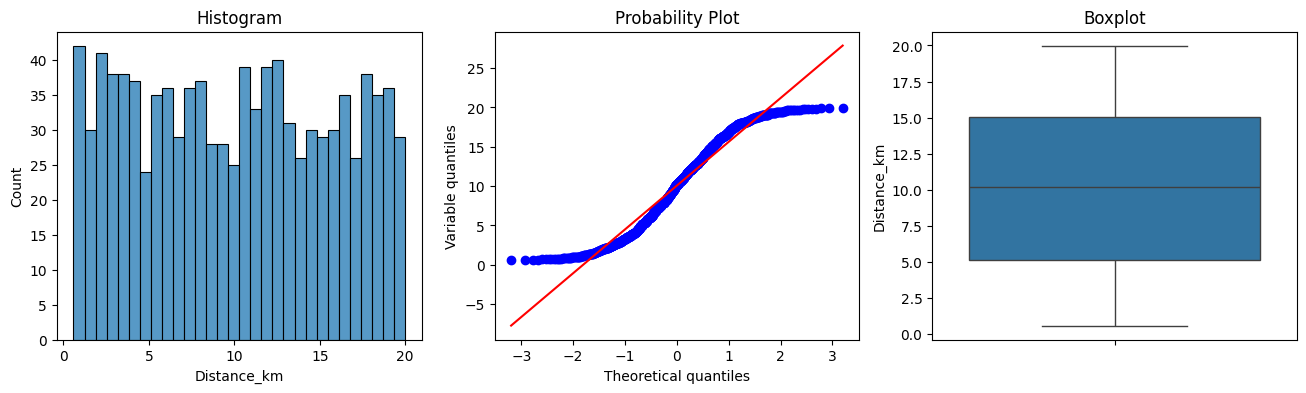

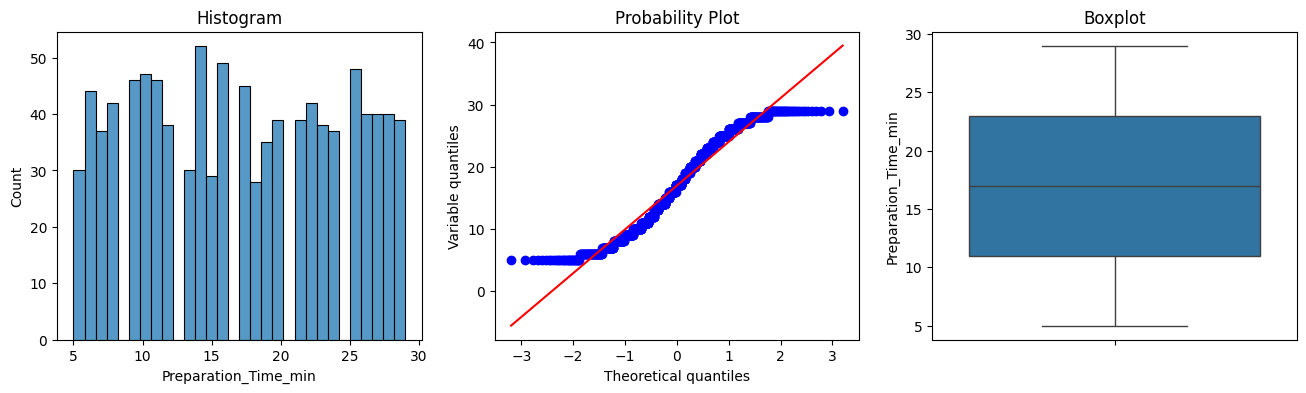

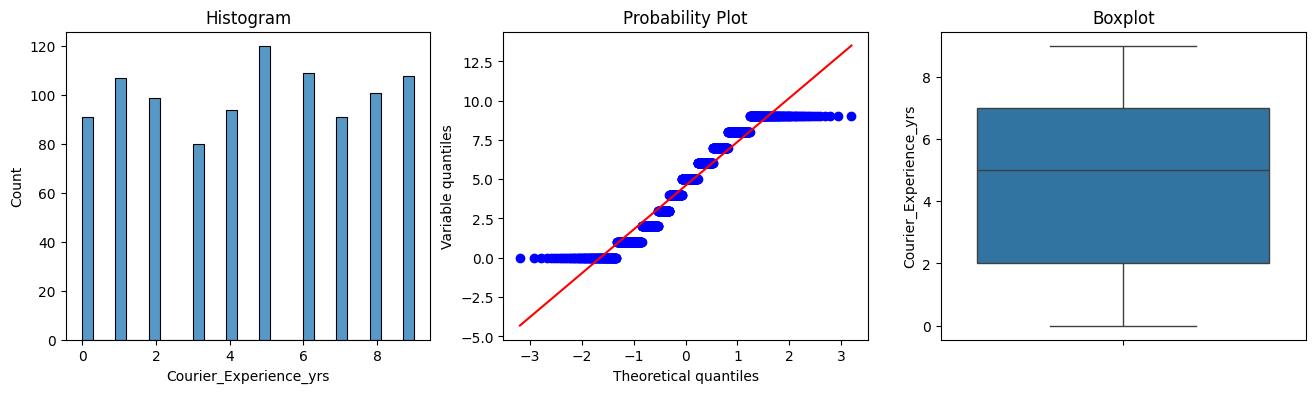

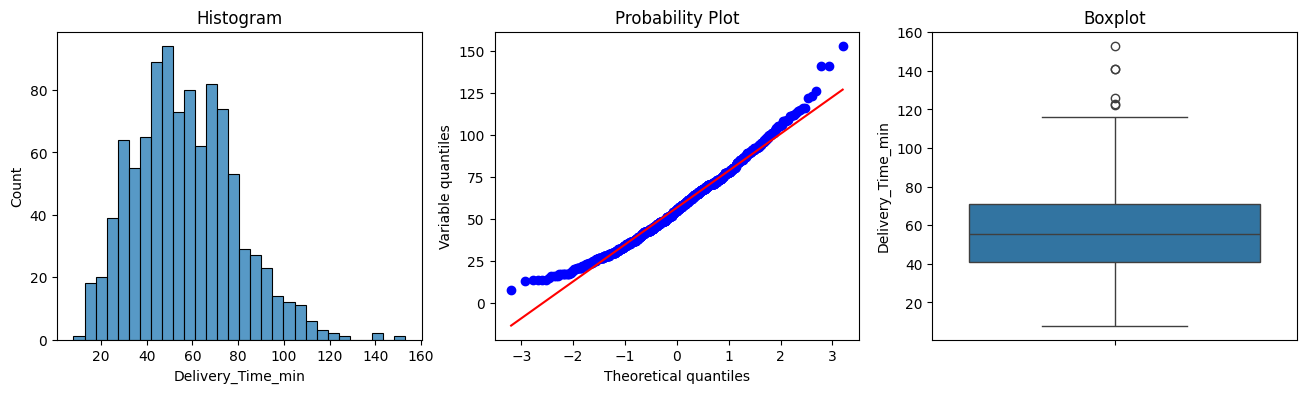

In [15]:
# Terapkan check_plot pada setiap kolom numerik
for col in numeric_cols:
    check_plot(data_eda, col)

there is no outlier found

In [16]:
print(f'Data Shape: {data_eda.shape}')

Data Shape: (1000, 9)


## Data Manipulation

In [17]:
data_eda['Total_Time'] = data_eda['Preparation_Time_min'] + data_eda['Delivery_Time_min']

In [18]:
data_eda['Speed'] = data_eda['Distance_km'] / data_eda['Delivery_Time_min']

In [19]:
data_eda.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Total_Time,Speed
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,55,5.422446
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84,104,5.115713
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59,87,6.197479
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,42,4.973118
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68,84,3.573305


In [20]:
data_eda.to_csv('FDT_cleaned.csv', index=False)